# Filter plot

This is a notebook to plot filters from CIGALE and obtain their wavelengths

Make sure to activate CIGALE first: pyenv activate CIGALE. Then open your notebook: jupyter notebook &

In [1]:
'''
Jorge Andrés Villa-Vélez
Laboratoire d'Astrophysique de Marseille (LAM)
jorgevilla.91@gmail.com / jorge.villa@lam.fr 

'''

# Regular packages

from pcigale.data import Database
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Filters_cosmos = ['galex.NUV', 'cfht.megacam.u',\
           'subaru.suprime.B', 'subaru.suprime.V', \
           'subaru.suprime.r', 'subaru.suprime.i',\
           'subaru.suprime.z', 'subaru.hsc.y',\
           'UKIRT_WFCJ', 'cfht.wircam.H',\
           'WFCAM_K', 'IRAC1', \
           'IRAC2','IRAC3',\
           'IRAC4','spitzer.mips.24',\
           'herschel.pacs.100',\
           'herschel.pacs.160',\
           'herschel.spire.PSW',\
           'herschel.spire.PMW',\
           'herschel.spire.PLW']

Filters_goodss = ['galex.NUV','UVIMOS',\
                  'hst.wfc.F435W', 'hst.wfc.F606W', 'hst.wfc.F755W', 'hst.wfc.F814W',\
                  'ACS_F850LP', 'WFC3_F098M', 'WFC3_F105W', 'hst.wfc3.F125W',\
                  'hst.wfc3.F160W', 'ISAACKs', 'spitzer.irac.ch1', 'spitzer.irac.ch2',\
                  'spitzer.irac.ch3','spitzer.irac.ch4','spitzer.mips.24',\
                  'herschel.pacs.70', 'herschel.pacs.100', 'herschel.pacs.160',\
                  'herschel.spire.PSW', 'herschel.spire.PMW', 'herschel.spire.PLW']

# names_cosmos = ['GALEX NUV',\
#                 'CFHT MegaCam u', 'Subaru suprime B' ,'Subaru suprime V', 'Subaru suprime r',\
#                 'Subaru suprime i', 'Subaru suprime z', 'Subaru suprime y', 'UKIRT WFCam J',\
#                 'CFHT wircam H', 'ISAAC Ks',\
#                 'Spitzer IRAC 3.6', 'Spitzer IRAC 4.5', 'Spitzer IRAC 5.8', 'Spitzer IRAC 8.0',\
#                 'Spitzer MIPS 24', 'Herchel PACS 100', 'Herchel PACS 160',\
#                 'Herchel SPIRE 250', 'Herchel SPIRE 350', 'Herchel SPIRE 500']

names_cosmos = ['GALEX NUV',\
                'CFHT  MegaCam u', 'Subaru Suprime-Cam B', 'Subaru Suprime-Cam V', 'Subaru Suprime-Cam r',\
                'Subaru Suprime-Cam i', 'Subaru Suprime-Cam z', 'Subaru Suprime-Cam y', 'UKIRT WFCam J',\
                'CFHT WIRCam H', 'UKIRT WFCam K',\
                '$Spitzer$ IRAC1 3.6 $\mu$m', '$Spitzer$ IRAC2 4.5 $\mu$m',\
                '$Spitzer$ IRAC3 5.8 $\mu$m', '$Spitzer}$ IRAC4 8.0 $\mu$m',\
                '$Spitzer$ MIPS 24 $\mu$m',\
                '$Herschel$ PACS 100 $\mu$m', '$Herschel$ PACS 160 $\mu$m',\
                '$Herschel$ SPIRE 250 $\mu$m',\
                '$Herschel$ SPIRE 350 $\mu$m',\
                '$Herschel$ SPIRE 500 $\mu$m']

names_goodss = ['GALEX NUV', 'VIMOS U',\
                'ACS F435W', 'ACS F606W' ,'ACS F775W', 'ACS F814W',\
                'ACS_F850LP', 'WFC3_F098M', 'WFC3_F105W', 'WFC3 F125W',\
                'WFC3 F160W', ' Ks',\
                'Spitzer IRAC 3.6', 'Spitzer IRAC 4.5', 'Spitzer IRAC 5.8', 'Spitzer IRAC 8.0',\
                'Spitzer MIPS 24', 'Herchel PACS 70', 'Herchel PACS 100', 'Herchel PACS 160',\
                'Herchel SPIRE 250', 'Herchel SPIRE 350', 'Herchel SPIRE 500']

In [3]:
print(len(names_cosmos))
print(len(Filters_cosmos))

21
21


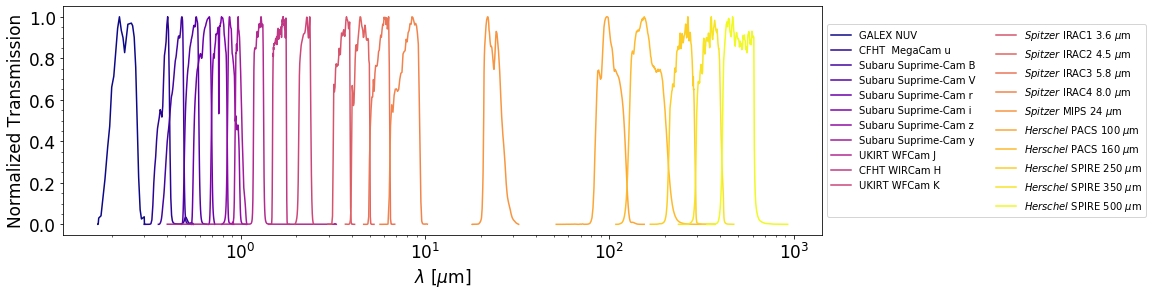

In [46]:
plt.figure(figsize=(17,6))

color=iter(plt.cm.plasma(np.linspace(0,1,len(Filters_cosmos))))
ax = plt.subplot(111)

for i in range(len(Filters_cosmos)):
    
    d = Database()
    f = d.get_filter(Filters_cosmos[i])
    t = f.trans_table
    
    normalized_t = (t[1]-np.min(t[1]))/(np.max(t[1])-np.min(t[1]))
#     normalized_t = t[1]/np.trapz(t[1], t[0])
    
#     plt.plot(t[0]*1e-3, t[1], label = '%s'%Filters[i])
    c = next(color)
    ax.plot(t[0]*1e-3, normalized_t, c = c, label = r'%s'%(names_cosmos[i]))
    
# ax.axvline(x = 1.3018, c = 'r', lw = 3, ls = '--', label = r'[OIII]$\lambda5007$ at z$\sim1.6$') # 5007.0 @ z~1.6 1.3018
# ax.axvline(x = 1.7063, c = 'b', lw = 3, ls = '--', label = r'H$\alpha$ at z$\sim1.6$')           # 6562.8 @z~1.6 1.7063
    
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height * 0.7])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 2)        
# ax.legend(loc='upper center', bbox_to_anchor=(0.47, 1.4), ncol = 5)        
    
    
plt.xscale('log')    
plt.minorticks_on()
plt.xlabel(r'$\lambda$ [$\mu$m]', fontsize = 17)
plt.ylabel('Normalized Transmission', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)

# plt.savefig('/Users/lam/Desktop/cosmos_filter.png', dpi = 300, bbox_inches = 'tight')

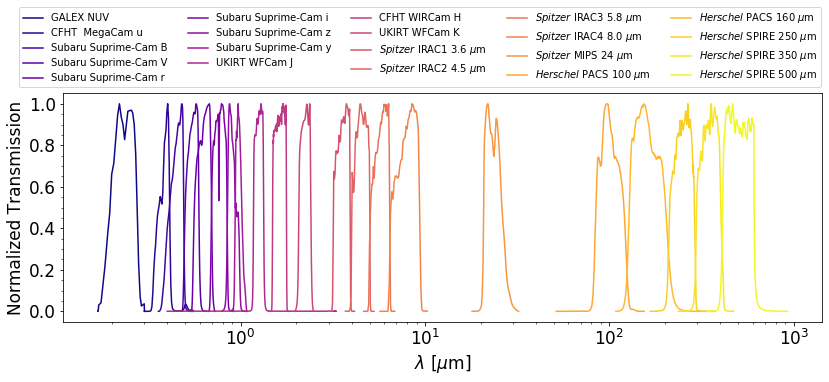

In [5]:
plt.figure(figsize=(17,6))

color=iter(plt.cm.plasma(np.linspace(0,1,len(Filters_cosmos))))
ax = plt.subplot(111)

for i in range(len(Filters_cosmos)):
    
    d = Database()
    f = d.get_filter(Filters_cosmos[i])
    t = f.trans_table
    
    normalized_t = (t[1]-np.min(t[1]))/(np.max(t[1])-np.min(t[1]))
#     normalized_t = t[1]/np.trapz(t[1], t[0])
    
#     plt.plot(t[0]*1e-3, t[1], label = '%s'%Filters[i])
    c = next(color)
    ax.plot(t[0]*1e-3, normalized_t, c = c, label = r'%s'%(names_cosmos[i]))
    
# ax.axvline(x = 1.3018, c = 'r', lw = 3, ls = '--', label = r'[OIII]$\lambda5007$ at z$\sim1.6$') # 5007.0 @ z~1.6 1.3018
# ax.axvline(x = 1.7063, c = 'b', lw = 3, ls = '--', label = r'H$\alpha$ at z$\sim1.6$')           # 6562.8 @z~1.6 1.7063
    
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height * 0.7])

# Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 2)        
ax.legend(loc='upper center', bbox_to_anchor=(0.47, 1.4), ncol = 5)        
    
    
plt.xscale('log')    
plt.minorticks_on()
plt.xlabel(r'$\lambda$ [$\mu$m]', fontsize = 17)
plt.ylabel('Normalized Transmission', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)

# plt.savefig('/Users/lam/Desktop/cosmos_filter.png', dpi = 300, bbox_inches = 'tight')